In [1]:
import pandas as pd 
import numpy as np
from scraper_nlp import get_synonym, tweet_scraper
from nlp_tools import scraper
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('bmh')
import nltk
%%matplotlib inline
nltk.download('punkt')

In [ ]:
sc = scraper()

# google docs

In [ ]:
data = sc.gdocs_scrapper('https://docs.google.com/document/u/0/d/1Uqq7PPDlCciayStO_lm_voe--grX2x4SroWyuoVDDPw/mobilebasic')
data = preprocessing_data(data)
df_final= find_sentiments(data)

## Horizontal barplot

In [ ]:
df_final.sum()\
.to_frame()\
.apply(lambda x : round(x/x.sum()*100, 2))\
.plot(kind='barh')

## fr

# Tweets

## Trouver les tweets associés aux mots sélectionnés

In [2]:
depression = ["étudiants","université","enseignement","cours","études","cursus","stage","éducation","logement","étudier"]
etudiant = ["dépression","dépressif","tristesse","fatigue","décourager","crise","stress","pression","insomnie","chômage","souffre","souffrir","anxiété","anxieux",
           "isolement","solitude","abandonné","mental","pensée","abandon", "suicide","décès","mort","suicidaires", "consulter","psy","psychologique"]
maladie = ["coronavirus","confinement","Covid","covid-19","virus","pandémie","épidémie","clusters"]

In [3]:
results = []
for i in maladie:
    for j in depression:
        for k in etudiant:
            url_pattern = "https://twitter.com/search?q={}%20{}%20{}%20since%3A2020-03-16&src=typed_query".format(i,j,k)
            tmp = sc.tweet_scraper(url_pattern)
            if tmp.shape[0] > 0 :
                results.append(tmp)
data =pd.concat(results)
data = preprocessing_data(data)
df_final= find_sentiments(data)

## Visualisation des varaiations de l'intensité des mots au cours du temps 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8213adfd0>,
      dtype=object)

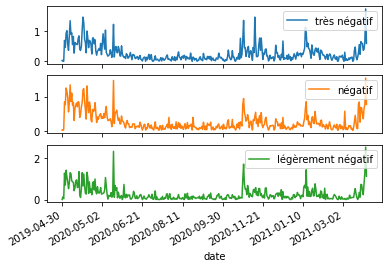

In [38]:
df_final.groupby('date').sum().apply(lambda x : round(x/x.sum()*100, 2)).plot(kind='line', subplots= True) 

## Visualisation des mots les plus fréquents retrouvés dans les tweets

In [80]:
tokens = nltk.tokenize.word_tokenize(data['CommentAferPreproc'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' '))
fd = nltk.FreqDist(tokens)
fd.plot(30,cumulative=False)


[nltk_data] Downloading package punkt to /home/danpdvn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


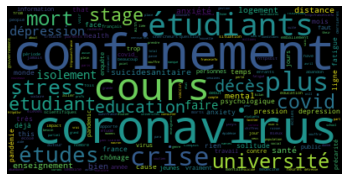

In [51]:
k_w = pd.DataFrame([(m, n) for m, n in fd.items() if len(m) > 3]).sort_values(1, ascending = False)[:5][0].to_list()

filter_words = dict([(m, n) for m, n in fd.items() if len(m) > 3])
fw = [(m, n) for m, n in fd.items() if len(m) > 3]
wcloud = WordCloud().generate_from_frequencies(filter_words)
 
# Plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

## Visualisation de la fréquences des 5 mots les plus récurrents dans les tweets au cours du temps

On a 

In [ ]:
ts = []
for date, group in data.groupby("date"):
    tokens = nltk.tokenize.word_tokenize(group['CommentAferPreproc'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' '))
    fd = nltk.FreqDist(tokens)
    fw = [(m, n) for m, n in fd.items() if len(m) > 3]
    tmp = pd.DataFrame(fw)
    tmp = tmp[tmp[0].isin(k_w)]
    tmp["date"] = date
    ts.append(tmp)

df_ts = pd.concat(ts)
df_ts.columns = ["words", "count", "date"]
df_fin = df_ts.pivot_table(index='date', columns= "words", values="count")

df_fin.iloc[0,:] = df_fin.iloc[0,:].fillna(0)

df_fin.fillna(method='ffill').plot(kind='line', subplots=True)